In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 准备数据集
# 用np生成一些序列数据，这个序列数据有四段
def waveform_dataset(points_num):
    '''建立波形数据集，这个数据集含有四段，每一段的数据点数为points_num'''
    stage1=1*np.cos(np.arange(points_num))
    stage2=2*np.cos(np.arange(points_num))
    stage3=3*np.cos(np.arange(points_num))
    stage4=4*np.cos(np.arange(points_num))
    
    dataset_X=np.array([stage1,stage2,stage3,stage4])# 4行points_num列
    dataset_X=dataset_X.reshape(points_num*4,1) # 转变为：4*points_num行，一列，即为整个序列
    
    amp1 = np.ones(points_num) # 每一段数据的幅度不同 分别是1,4,2,0.5
    amp2 = 4 + np.zeros(points_num) 
    amp3 = 2 * np.ones(points_num) 
    amp4 = 0.5 + np.zeros(points_num) 
    dataset_y=np.array([amp1,amp2,amp3,amp4]).reshape(points_num*4,1)
    return dataset_X,dataset_y


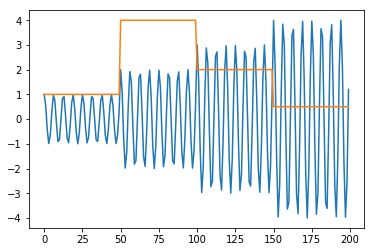

In [4]:
# 查看时序数据集
dataset_X,dataset_y=waveform_dataset(50)
plt.plot(dataset_X)
plt.plot(dataset_y)

In [6]:
# 构建并训练模型
import neurolab as nl
net = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
# 创建两层的神经网络
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()
# 网络的初始化
error = net.train(dataset_X, dataset_y, epochs=3000, show=300, goal=0.01)

Epoch: 300; Error: 0.08632353521527447;
Epoch: 600; Error: 0.07758197978278435;
Epoch: 900; Error: 0.047083147244329486;
Epoch: 1200; Error: 0.03948011155907889;
Epoch: 1500; Error: 0.03808612642771739;
Epoch: 1800; Error: 0.03600983543384789;
Epoch: 2100; Error: 0.04108011778013388;
Epoch: 2400; Error: 0.0388262030539809;
Epoch: 2700; Error: 0.033576743782171244;
Epoch: 3000; Error: 0.03329548827926802;
The maximum number of train epochs is reached


Text(0.5,1,'Comparison of Truth and Predicted')

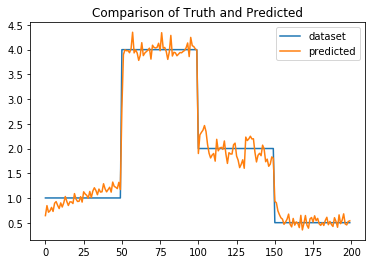

In [9]:
# 用训练好的模型预测新样本
predict_y=net.sim(dataset_X)
plt.plot(dataset_y,label='dataset')
plt.plot(predict_y,label='predicted')
plt.legend()
plt.title('Comparison of Truth and Predicted')

Text(0.5,1,'Comparison of Truth and Predicted')

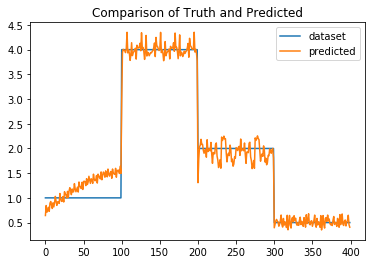

In [10]:
# 生成新的数据集
newset_X,newset_y=waveform_dataset(100)
predict_y=net.sim(newset_X)
plt.plot(newset_y,label='dataset')
plt.plot(predict_y,label='predicted')
plt.legend()
plt.title('Comparison of Truth and Predicted')